# Double diffusion: salt fingering case

This notebook shows results from a test case where a type of double-diffusion (salt fingering; i.e., warm and salty water over cold and fresh water) occurs. 

In [19]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 4.0)

Populating the interactive namespace from numpy and matplotlib


## Initial Conditions 

The initial water column is warm and salty water over cold and fresh water:

* The top layer is 100 m deep and homogeneous, with $S_1$ = 35 and $\theta_1$ = 20;

* The bottom layer is stratified, with $\frac{\partial \theta_2}{\partial z} = 5.0E-4$ and $\frac{\partial \S_2}{\partial z} = 1.0E-04$.

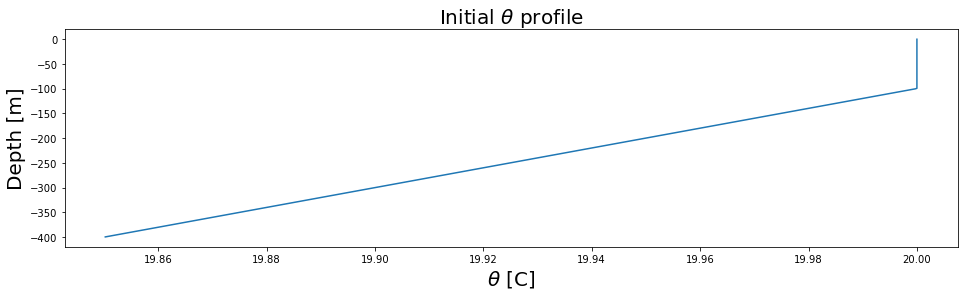

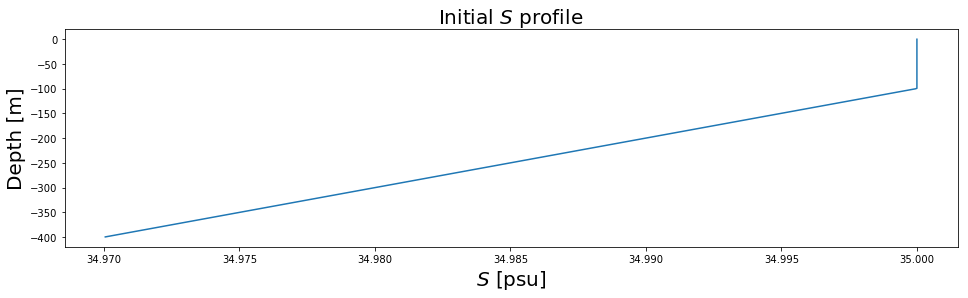

In [24]:
temp_ic = Dataset('MOM_IC.nc').variables['Temp'][0,:,1,1]
salt_ic = Dataset('MOM_IC.nc').variables['Salt'][0,:,1,1]
z = Dataset('MOM_IC.nc').variables['Layer'][:]
plt.figure()
plt.plot(temp_ic,-z); plt.title(r'Initial $\theta$ profile', fontsize=20)
plt.xlabel(r'$\theta$ [C]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20)
plt.figure()
plt.plot(salt_ic,-z); plt.title(r'Initial $S$ profile', fontsize=20)
plt.xlabel(r'$S$ [psu]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20)

## Changes in potential temperature ($\theta$) and salinity (S) 

(-200, 0)

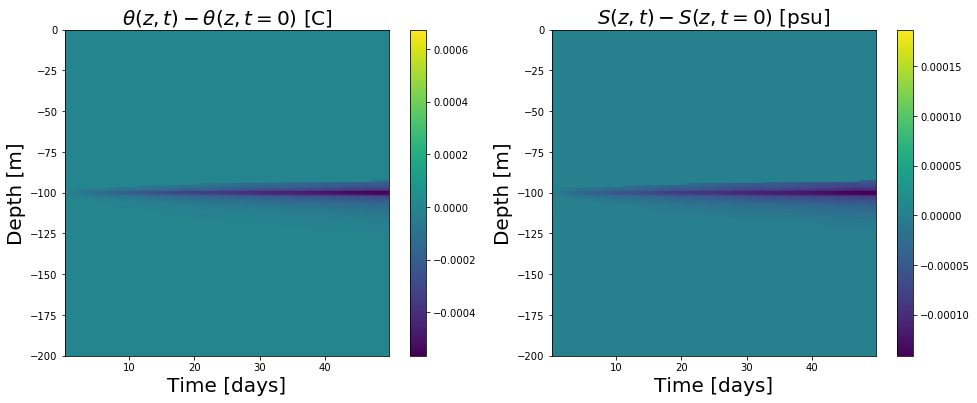

In [21]:
time = Dataset('prog_z.nc').variables['Time'][:]
temp =  Dataset('prog_z.nc').variables['temp'][:,:,1,1]
temp_drift  = temp-temp[0,:]
salt =  Dataset('prog_z.nc').variables['salt'][:,:,1,1]
salt_drift  = salt-salt[0,:]
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.pcolormesh(time, -z, temp_drift.T)
plt.colorbar(); plt.title(r'$\theta(z,t) - \theta(z,t=0)$ [C]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-200,0])
plt.subplot(122)
plt.pcolormesh(time, -z, salt_drift.T)
plt.colorbar(); plt.title(r'$S(z,t) - S(z,t=0)$ [psu]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-200,0])

## Vertical diffusivities ($\kappa_T$ and $\kappa_S$)

(-200, 0)

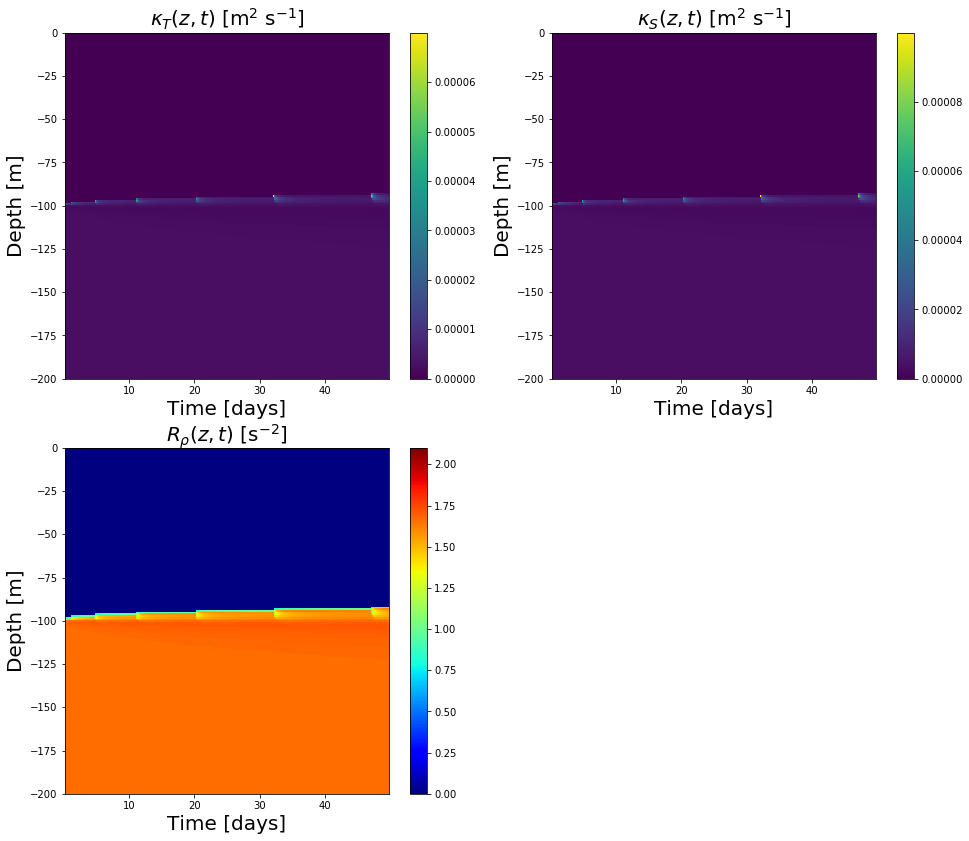

In [23]:
kd_T =  Dataset('visc.nc').variables['Kd_heat'][:,:,1,1] # total vertical heat diffusivity
kd_S =  Dataset('visc.nc').variables['Kd_salt'][:,:,1,1] # total vertical salt diffusivity
R_rho =  Dataset('visc.nc').variables['R_rho'][:,:,1,1]
zi =  Dataset('visc.nc').variables['zi'][:]

plt.figure(figsize=(16,14))
plt.subplot(221)
plt.pcolormesh(time, -zi, kd_T.T)
plt.colorbar(); plt.title(r'$\kappa_T(z,t)$ [m$^2$ s$^{-1}$]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-200,0])

plt.subplot(222)
plt.pcolormesh(time, -zi, kd_S.T)
plt.colorbar(); plt.title(r'$\kappa_S(z,t)$ [m$^2$ s$^{-1}$]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-200,0])

plt.subplot(223)
plt.pcolormesh(time, -zi, R_rho.T, cmap=plt.cm.jet,vmin=0, vmax=2.1)
plt.colorbar(); plt.title(r'$R_{\rho}(z,t)$ [s$^{-2}$]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-200,0])